# Installs and imports

In [102]:
# peep peeep installs
!pip install pandas -q
# Load bar (i forgot to use it of course)
!pip install tqdm -q
# Visualisation and model building libraries
!pip install missingno -q
!pip install pyarrow -q
!pip install scipy -q
!pip install scikit-learn -q
# for quick visualisation of missing data;
!pip install missingno -q

In [766]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer
# Our pipeline parts: 
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
#Gonna use MSNO to quickly create a test set based on missing data visualisation.
import missingno as msno

# Loading data and quick EDA of missingness

In [335]:
df_users = pd.read_parquet('/work/imputation_data/data/users/data_users.parquet', engine = 'pyarrow')

In [849]:
data = pd.read_csv('clean_data.csv') 
# This dataset is a clean version of the original data, where we've put in our found users, and removed a few unnecessary dimensions.
# We've also added in a few new dimensions that will be explained later
true_data = pd.read_csv('clean_data.csv')

In [850]:
data

,RN,UserinfoCountry,HealthcareWorker,Profession,Experiance,WorkPlace,SafeDeliveryApp,UserinfoIsMyLearning,UserinfoUserIsActive,KlpResultLevel,Module_Key,Time
0,14.0,1,1,4,1,5,5,1.0,0.0,0.0,-1.0,0.0
1,10.0,1,1,4,1,2,3,1.0,0.0,0.0,-1.0,0.0
2,12.0,1,0,4,0,1,3,1.0,0.0,0.0,-1.0,0.0
3,15.0,1,1,1,1,2,5,1.0,0.0,0.0,-1.0,0.0
4,12.0,1,1,4,0,4,2,1.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91004,10.0,1,1,3,1,4,4,0.0,1.0,0.0,-1.0,0.0
91005,9.0,1,1,5,3,0,8,1.0,1.0,0.0,-1.0,0.0
91006,9.0,1,1,2,2,0,4,0.0,1.0,0.0,-1.0,0.0
91007,10.0,1,1,0,1,1,5,0.0,1.0,0.0,-1.0,0.0


In [851]:
df_users_nanified = df_users.replace('Unknown', np.nan)

<AxesSubplot:>

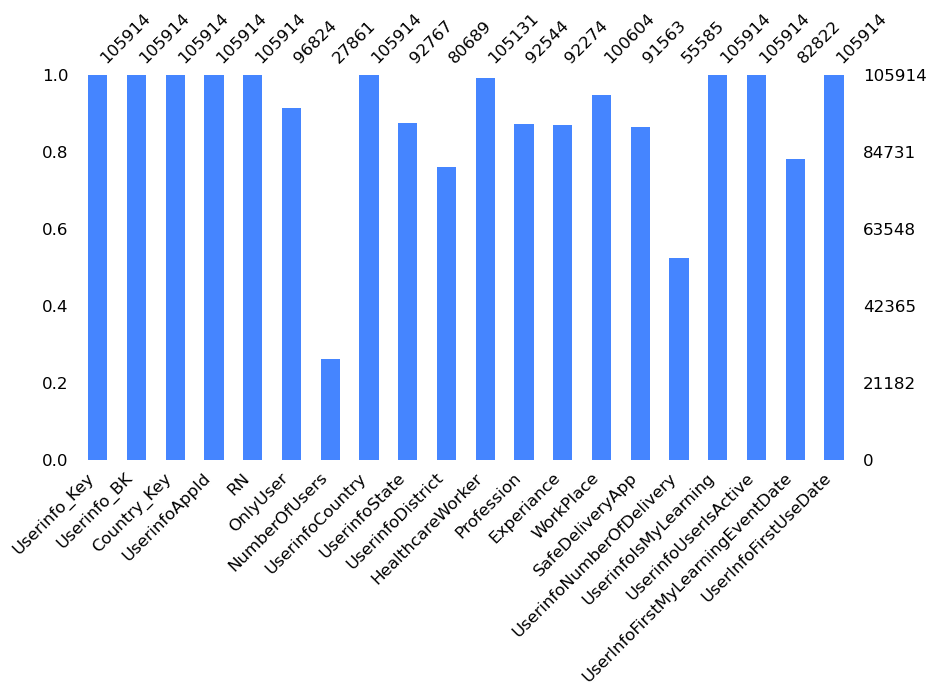

In [852]:
msno.bar(df_users_nanified, figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

In [853]:
# Select the variable with missing data and the other variable of interest
x = df_users_nanified['Experiance']
y = df_users_nanified['UserinfoCountry']
# Compute the chi-square test statistic and p-value
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(x, y))
# Print the results
print(f'Chi-square test statistic (Experiance): {chi2:.3f}')
print(f'p-value (Experiance): {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant association between the missing data in Experiance and UserinfoCountry.')
else:
    print('There is no significant association between the missing data in Experiance and UserinfoCountry.')

Chi-square test statistic (Experiance): 300.559
p-value (Experiance): 0.000
There is a significant association between the missing data in Experiance and UserinfoCountry.


In [854]:
# Select the variable with missing data and the other variable of interest
x = df_users_nanified['Profession']
y = df_users_nanified['UserinfoCountry']
# Compute the chi-square test statistic and p-value
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(x, y))
# Print the results
print(f'Chi-square test statistic (Profession): {chi2:.3f}')
print(f'p-value (Profession): {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant association between the missing data in Profession and UserinfoCountry.')
else:
    print('There is no significant association between the missing data in Profession and UserinfoCountry.')

Chi-square test statistic (Profession): 5434.708
p-value (Profession): 0.000
There is a significant association between the missing data in Profession and UserinfoCountry.


In [855]:
# Select the variable with missing data and the other variable of interest
x = df_users_nanified['WorkPlace']
y = df_users_nanified['UserinfoCountry']
# Compute the chi-square test statistic and p-value
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(x, y))
# Print the results
print(f'Chi-square test statistic (WorkPlace): {chi2:.3f}')
print(f'p-value (WorkPlace): {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant association between the missing data in WorkPlace and UserinfoCountry.')
else:
    print('There is no significant association between the missing data in WorkPlace and UserinfoCountry.')

Chi-square test statistic (WorkPlace): 1477.583
p-value (WorkPlace): 0.000
There is a significant association between the missing data in WorkPlace and UserinfoCountry.


In [856]:
# Select the variable with missing data and the other variable of interest
x = df_users_nanified['HealthcareWorker']
y = df_users_nanified['UserinfoCountry']
# Compute the chi-square test statistic and p-value
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(x, y))
# Print the results
print(f'Chi-square test statistic (HealthcareWorker): {chi2:.3f}')
print(f'p-value (HealthcareWorker): {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant association between the missing data in HealthcareWorker and UserinfoCountry.')
else:
    print('There is no significant association between the missing data in HealthcareWorker and UserinfoCountry.')

Chi-square test statistic (HealthcareWorker): 12.271
p-value (HealthcareWorker): 0.000
There is a significant association between the missing data in HealthcareWorker and UserinfoCountry.


In [857]:
# Select the variable with missing data and the other variable of interest
x = df_users_nanified['SafeDeliveryApp']
y = df_users_nanified['UserinfoCountry']
# Compute the chi-square test statistic and p-value
chi2, p_value, _, _ = stats.chi2_contingency(pd.crosstab(x, y))
# Print the results
print(f'Chi-square test statistic (SafeDeliveryApp): {chi2:.3f}')
print(f'p-value (SafeDeliveryApp): {p_value:.3f}')

# Interpret the results
if p_value < 0.05:
    print('There is a significant association between the missing data in SafeDeliveryApp and UserinfoCountry.')
else:
    print('There is no significant association between the missing data in SafeDeliveryApp and UserinfoCountry.')

Chi-square test statistic (SafeDeliveryApp): 3811.229
p-value (SafeDeliveryApp): 0.000
There is a significant association between the missing data in SafeDeliveryApp and UserinfoCountry.


It seems that the data missingness is either MAR or MNAR. Based on where the data is coming from originally, it is likely MNAR.

Due to location data being very hard to predict, we have instead chosen to focus on the user characteristics that we believe are possible to impute
within a certain degree of accuracy. These dimensions are;
HealthcareWorker, Profession, Experiance, WorkPlace, SafeDeliveryApp

Based on the results from our Feature Importance analysis, we know that we only need certain dimensions to impute, so the remaining dimensions/features have been stripped
Also we have calculated/found a further 3 dimensions to try and help us build the missing data.
Time is average time spent per month across the entire datas timeperiod
KlpResultLevel is the users highest level achieved within any module
Module_Key is the users most frequently accessed module according to data_activity.

In [860]:
seed = 42069 # We had to get a bit creative with the seed, due to some initial issues with labels that went messing

In [861]:
data

,RN,UserinfoCountry,HealthcareWorker,Profession,Experiance,WorkPlace,SafeDeliveryApp,UserinfoIsMyLearning,UserinfoUserIsActive,KlpResultLevel,Module_Key,Time
0,14.0,1,1,4,1,5,5,1.0,0.0,0.0,-1.0,0.0
1,10.0,1,1,4,1,2,3,1.0,0.0,0.0,-1.0,0.0
2,12.0,1,0,4,0,1,3,1.0,0.0,0.0,-1.0,0.0
3,15.0,1,1,1,1,2,5,1.0,0.0,0.0,-1.0,0.0
4,12.0,1,1,4,0,4,2,1.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
91004,10.0,1,1,3,1,4,4,0.0,1.0,0.0,-1.0,0.0
91005,9.0,1,1,5,3,0,8,1.0,1.0,0.0,-1.0,0.0
91006,9.0,1,1,2,2,0,4,0.0,1.0,0.0,-1.0,0.0
91007,10.0,1,1,0,1,1,5,0.0,1.0,0.0,-1.0,0.0


Feature importances;

Workplace: Time -> RN -> Profession -> SafeDeliveryApp -> Experiance -> KlpResultLevel -> UserinfoIsMyLearning -> Module_Key -> UserinfoIsActive -> UserinfoCountry

Experiance: Time -> Profession -> KlpResultLevel -> Workplace -> SafeDeliveryApp -> UserinfoIsMyLearning -> Module_Key -> UserinfoIsActive -> UserinfoCountry

SafeDeliveryApp: Time -> RN -> KlpResultLevel -> Workplace -> Experiance -> Profession -> UserinfoIsMyLearning -> Module_Key -> UserinfoCountry -> UserinfoIsActive

Profession: Workplace -> Experiance -> Time -> RN -> SafeDeliveryApp -> KlpResultLevel -> UserinfoIsMyLearning -> UserinfoCountry -> UserinfoUserIsActive -> Module_Key

We will first simply test how imputation of all these dimensions together work. Then we will try imputing the individual dimensions based on it's feature importance 

<AxesSubplot:>

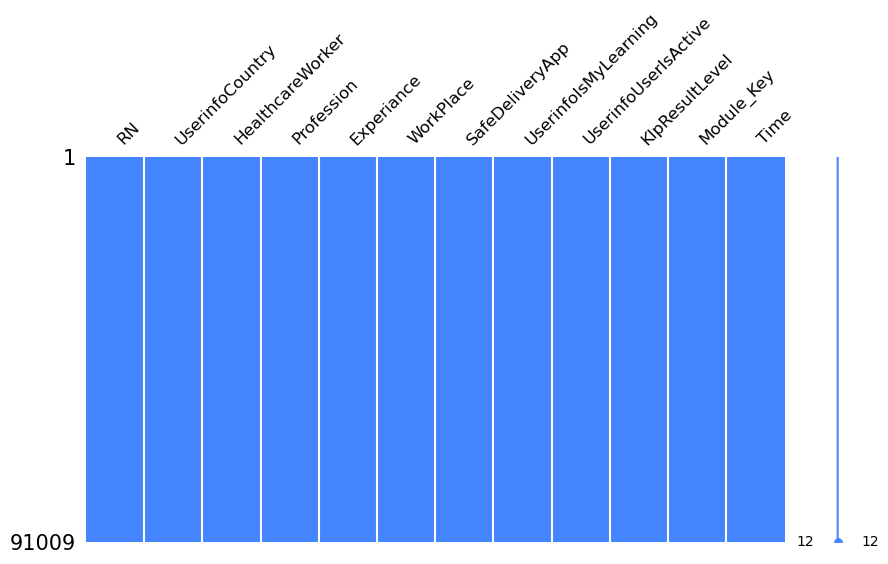

In [863]:
msno.matrix(data, figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0)) 
# Right now our dataset is completely clean. We have 91009 rows, which should still give us a clear result.

In [864]:
# So to test our model, we need to recreate a test set, that is as close to the original data as we can.
print(f"Profession has {100 - ( df_users_nanified['Profession'].value_counts().sum() / len(df_users_nanified.index)) * 100} % of the true data is missing")
print('')
print(f"HealthcareWorker has {100 - (df_users_nanified['HealthcareWorker'].value_counts().sum() / len(df_users_nanified.index)) * 100} % of the true data is missing")
print('')
print(f"Experiance has {100 - (df_users_nanified['Experiance'].value_counts().sum() / len(df_users_nanified.index)) * 100} % of the true data missing")
print('')
print(f"WorkPlace has {100 - (df_users_nanified['WorkPlace'].value_counts().sum() / len(df_users_nanified.index)) * 100} % of the true data is missing")
print('')
print(f"SafeDeliveryApp has {100 - (df_users_nanified['SafeDeliveryApp'].value_counts().sum() / len(df_users_nanified.index)) * 100} % of the true data is missing")

Profession has 12.623449213512856 % of the true data is missing
HealthcareWorker has 0.739279037709835 % of the true data is missing
Experiance has 12.878373019619687 % of the true data missing
WorkPlace has 5.013501520101215 % of the true data is missing
SafeDeliveryApp has 13.549672375701036 % of the true data is missing


In [865]:
# Let's introduce our NaN's to our test set
# I want to recreate the rough percentages (frac=) of missingnesss
#Percent missingness for Profession : roughly 13 %
cols = ['Profession']
for col in cols:
    data.loc[data.sample(frac=0.126, random_state = seed).index, col] = pd.np.nan
#Percent missingness for WorkPlace : roughly 5 %
cols = ['WorkPlace']
for col in cols:
    data.loc[data.sample(frac=0.05, random_state = seed).index, col] = pd.np.nan
#Percent missingness for Experiance : roughly 12 %    
cols = ['Experiance']
for col in cols:
    data.loc[data.sample(frac=0.128, random_state = seed).index, col] = pd.np.nan
#Percent missingness for HealthcareWorker : 0.7 %
cols = ['HealthcareWorker']
for col in cols:
    data.loc[data.sample(frac=0.007, random_state = seed).index, col] = pd.np.nan
#Percent missingness for SafeDeliveryApp  : 0.7 %
cols = ['SafeDeliveryApp']
for col in cols:
    data.loc[data.sample(frac=0.135, random_state = seed).index, col] = pd.np.nan

/tmp/ipykernel_54/1231861608.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.loc[data.sample(frac=0.126, random_state = seed).index, col] = pd.np.nan
/tmp/ipykernel_54/1231861608.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.loc[data.sample(frac=0.05, random_state = seed).index, col] = pd.np.nan
/tmp/ipykernel_54/1231861608.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.loc[data.sample(frac=0.128, random_state = seed).index, col] = pd.np.nan
/tmp/ipykernel_54/1231861608.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data.loc[data.sample(frac=0.007, random_state = seed).index, col] = pd.np.nan
/t

<AxesSubplot:>

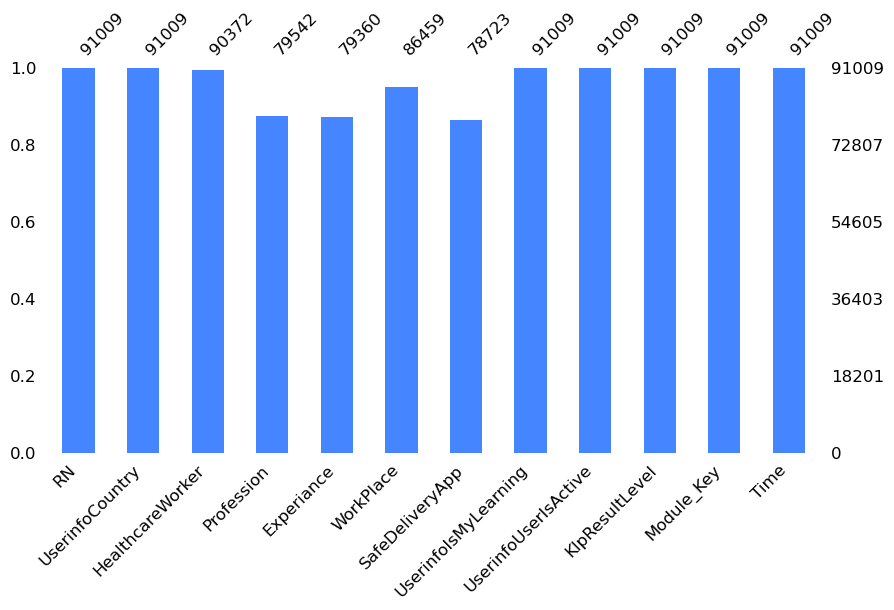

In [866]:
# So now our test data has the same proportional missingness. Let's try and use our pipeline, and then compare.
msno.bar(data, figsize=(10,5), fontsize=(12), color=(0.27,0.52,1.0))

# Model pipeline Building and imputation

In [951]:
# Start up our models
# I begin with a relatively low level of neighbors, compared to the sample size, to see how it handles the imputation. 
# I also choose to base the imputation on the distance between neighbors, rather than a uniform distribution between all closest neighbours
# Hopefully this means that our imputations should be slightly more accurate in terms of user characteristics
#model = KNeighborsClassifier(n_neighbors=29,weights='distance',n_jobs=-1)
model = KNeighborsRegressor(n_neighbors=100,weights='uniform',n_jobs=-1,)
imputer = IterativeImputer(sample_posterior=False, random_state=seed,estimator=model, max_iter=100,initial_strategy='most_frequent')
scaler = MinMaxScaler(feature_range=(0, 1))
# Building the pipeline
pipeline = Pipeline(
    steps=[
    ('s', scaler), # First we scale the data
    ('i', imputer) # Then we fit the imputer and transform the NaN's
    ]
)

We also performed the imputation using a training and test set. Here we randomly took 75 % of the full clean dataframe for our training data.
The remaining 25% went into our test set, into which we then injected NaN's in the same proportions as the original data.

The results of this however was the same. Which is likely due to IterativeImputers functionality, where it doesn't work like most UML/SML models.
Instead of being trained/fit on clean data, and then using this to transform a target dataframe, it simply fits and transforms the target data alone.
This means that the clean data is mostly used as a point of reference in our testing, so that we can compare our imputations directly.

In [952]:
#pipeline.fit(training_data)

In [953]:
#data_imputed = pipeline.transform(testing_data)

In [954]:
data_imputed = pipeline.fit_transform(data) # We transform the data, and save it as data_imputed

/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [955]:
data_imputed = scaler.inverse_transform(data_imputed) 
# after the pipeline has imputed the data, we need to return it to the original scale. We scaled it down to a feature range of
# 0-1 to help the model generalize from the data.
data_imputed

array([[14.,  1.,  1., ...,  0., -1.,  0.],
       [10.,  1.,  1., ...,  0., -1.,  0.],
       [12.,  1.,  0., ...,  0., -1.,  0.],
       ...,
       [ 9.,  1.,  1., ...,  0., -1.,  0.],
       [10.,  1.,  1., ...,  0., -1.,  0.],
       [ 9.,  1.,  1., ...,  0., -1.,  0.]])

In [956]:
imputed_df = pd.DataFrame(data_imputed).astype(np.int64)
imputed_df # Here we put the dataframe back together.

,0,1,2,3,4,5,6,7,8,9,10,11
0,14,1,1,4,1,5,5,1,0,0,-1,0
1,10,1,1,4,1,2,3,1,0,0,-1,0
2,12,1,0,4,0,1,3,1,0,0,-1,0
3,15,1,1,1,1,2,5,1,0,0,-1,0
4,12,1,1,4,0,4,2,1,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91004,10,1,1,3,1,4,4,0,1,0,-1,0
91005,9,1,1,5,3,0,8,1,1,0,-1,0
91006,9,1,1,2,2,0,4,0,1,0,-1,0
91007,10,1,1,2,1,1,4,0,1,0,-1,0


In [957]:
# Let's get the names back to the imputed columns;
for i in list(range(12)): #This needs to be the same number as the number of columns
    imputed_df.rename(columns={i:list(data.columns)[i]},inplace = True)

In [958]:
imputed_df # There we go. Now let's compare the distributions of our imputed labels to the true labels;

,RN,UserinfoCountry,HealthcareWorker,Profession,Experiance,WorkPlace,SafeDeliveryApp,UserinfoIsMyLearning,UserinfoUserIsActive,KlpResultLevel,Module_Key,Time
0,14,1,1,4,1,5,5,1,0,0,-1,0
1,10,1,1,4,1,2,3,1,0,0,-1,0
2,12,1,0,4,0,1,3,1,0,0,-1,0
3,15,1,1,1,1,2,5,1,0,0,-1,0
4,12,1,1,4,0,4,2,1,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91004,10,1,1,3,1,4,4,0,1,0,-1,0
91005,9,1,1,5,3,0,8,1,1,0,-1,0
91006,9,1,1,2,2,0,4,0,1,0,-1,0
91007,10,1,1,2,1,1,4,0,1,0,-1,0


# Test results for imputation on full dataframe

In [959]:
def mse(imputed, true):
    return ((imputed - true) ** 2).mean()

# Calculate MAE
def mae(imputed, true):
    return (np.abs(imputed - true)).mean()

We can look at the MSE between our true and imputed values, to see how good our imputations are.
For most of the interesting dimensions, they seem to have a relatively low number score, besides SafeDeliveryApp
Seeing as the data is label encoded, and most of these contain 5-6 labels, these low MSE score indicate that we are close to the original mean value.
Although SafeDeliveryApp does contain 9 labels, it is still not a very decent score.

In [998]:
mse_results = imputed_df.apply(lambda x: mse(x, true_data[x.name]))
mae_results = imputed_df.apply(lambda x: mae(x, true_data[x.name]))
variance = true_data.apply(lambda x: x.var())
mad = true_data.apply(lambda x: x.mad())

print("Variance of true data:")
print(variance)
print('')
print("Mean Absolute Deviation of true data:")
print(mad)
print('')
print("Mean Square Error results between imputation and true data:")
print(mse_results)
print('')
print("Mean Absolute Error results between imputation and true data:")
print(mae_results)

NameError: name 'imputed_df' is not defined

If we compare these values to the variation of the true data, we can better evaluate the quality of our imputation model.

For Profession, we see that the variation is around 1.4, which means our MSE is significantly under.
This means our estimate is pretty solid when compared to the true mean of Profession

For Experiance, we see the same thing. Our estimate relative to the true mean is pretty solid.

For WorkPlace, our estimate relative to the mean value is really strong. Our MSE here is only 0.136866 relative to the variation of 2.02

For SafeDeliveryApp, estimate also seems pretty solid when looking at the comparison between MSE and variation.

In [963]:
imputed_df.subtract(true_data).sum() #First let's take a look at our difference matrix for each column;

RN                          0.000000
UserinfoCountry             0.000000
HealthcareWorker            0.000000
Profession              -8504.000000
Experiance              -6308.000000
WorkPlace               -3266.000000
SafeDeliveryApp        -12478.000000
UserinfoIsMyLearning        0.000000
UserinfoUserIsActive        0.000000
KlpResultLevel          -4952.122461
Module_Key               -198.000000
Time                    -2193.000000
dtype: float64

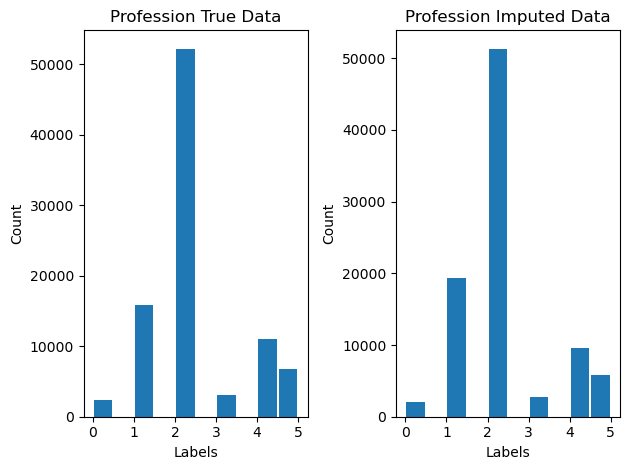

In [964]:
# Let's also compare the distribution of the labels in the true data versus imputed data.
plt.subplot(1, 2, 1)
plt.hist(true_data['Profession'],rwidth=0.9)
plt.title('Profession True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.hist(imputed_df['Profession'].astype(np.int64),rwidth=0.9)
plt.title('Profession Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5])

plt.tight_layout()
plt.show()

In [965]:
# Finally, we can directly calculate the number of misplaced labels by simply comparing the label counts of the true versus imputed data:
print(true_data['Profession'].value_counts().sort_index())

0     2308
1    15779
2    52181
3     3083
4    10952
5     6706
Name: Profession, dtype: int64


In [966]:
print(imputed_df['Profession'].astype(np.int64).value_counts().sort_index())

0     2001
1    19413
2    51324
3     2802
4     9588
5     5881
Name: Profession, dtype: int64


In [967]:
#These can be considered to be in a kind of equilibrium, where all values should sum to 0 regardless of accuracy.
#This means we can take the total sum of either, and divide by the original number of missing values for each feature, to find our prediction accuracy as a percentage.
print(imputed_df['Profession'].astype(np.int64).value_counts().sort_index() - true_data['Profession'].value_counts().sort_index())

0    -307
1    3634
2    -857
3    -281
4   -1364
5    -825
Name: Profession, dtype: int64


In [991]:
print(f' Accuracy for Profession: {100 - (3634 / (0.13 * len(true_data.index)) * 100)} %')
print(f' Percent misplaced labels: {(3634 / (0.13 * len(true_data.index))) * 100} %')

 Accuracy for Profession: 69.28452553720385 %
 Percent misplaced labels: 30.715474462796156 %


In [969]:
#Profession has 87.37655078648714 % of the true data. This equals 0.13 * 91000 = 11830 for our test data.
# (2822 + 61) / 11830 ) * 100 = 24.37 % misplaced labels. Accuracy is therefore 75.63% for fit_transform(data) method.

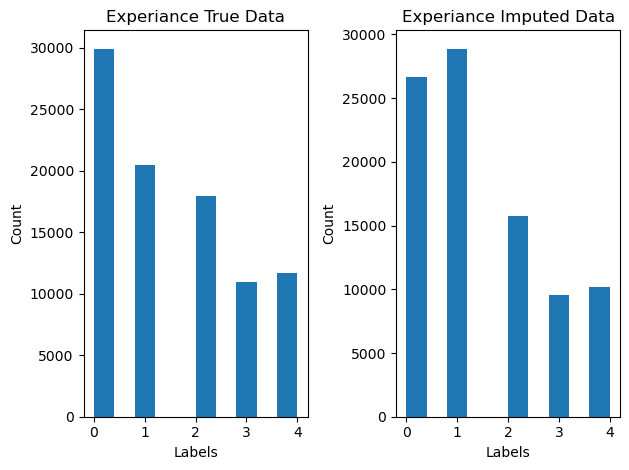

In [970]:
plt.subplot(1, 2, 1)
plt.hist(true_data['Experiance'])
plt.title('Experiance True Data')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(imputed_df['Experiance'].astype(np.int64))
plt.title('Experiance Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [971]:
print(true_data['Experiance'].value_counts().sort_index())

0    29934
1    20468
2    17919
3    10984
4    11704
Name: Experiance, dtype: int64


In [972]:
print(imputed_df['Experiance'].astype(np.int64).value_counts().sort_index())

0    26649
1    28879
2    15726
3     9585
4    10170
Name: Experiance, dtype: int64


In [973]:
print(imputed_df['Experiance'].astype(np.int64).value_counts().sort_index() - true_data['Experiance'].value_counts().sort_index())

0   -3285
1    8411
2   -2193
3   -1399
4   -1534
Name: Experiance, dtype: int64


In [992]:
print(f' Accuracy for Experiance: {100 - (8411 / (0.128 * len(true_data.index)) * 100)} %')
print(f' Percent misplaced labels: {(8411 / (0.128 * len(true_data.index))) * 100} %')

 Accuracy for Experiance: 27.797319495874035 %
 Percent misplaced labels: 72.20268050412596 %


In [975]:
#Experiance has 87.12162698038031 % of the true data. This equals 0.13 * 91000 = 11830 for our test data.
# 7757 / 11830 ) * 100 = 65.57 % misplaced labels. Accuracy is therefore 34.43 % for fit_transform(data) method. 

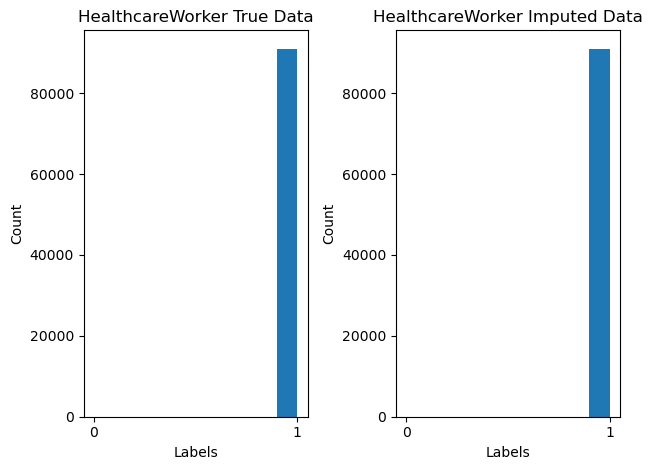

In [976]:
plt.subplot(1, 2, 1)
plt.hist(true_data['HealthcareWorker'])
plt.title('HealthcareWorker True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1])

plt.subplot(1, 2, 2)
plt.hist(imputed_df['HealthcareWorker'].astype(np.int64))
plt.title('HealthcareWorker Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [977]:
print(true_data['HealthcareWorker'].value_counts().sort_index())

0       15
1    90994
Name: HealthcareWorker, dtype: int64


In [978]:
print(imputed_df['HealthcareWorker'].astype(np.int64).value_counts().sort_index())

0       15
1    90994
Name: HealthcareWorker, dtype: int64


In [979]:
print(true_data['HealthcareWorker'].value_counts().sort_index() - imputed_df['HealthcareWorker'].astype(np.int64).value_counts().sort_index())

0    0
1    0
Name: HealthcareWorker, dtype: int64


In [980]:
# All true values found, no much of a surprise with less than 1% missing.

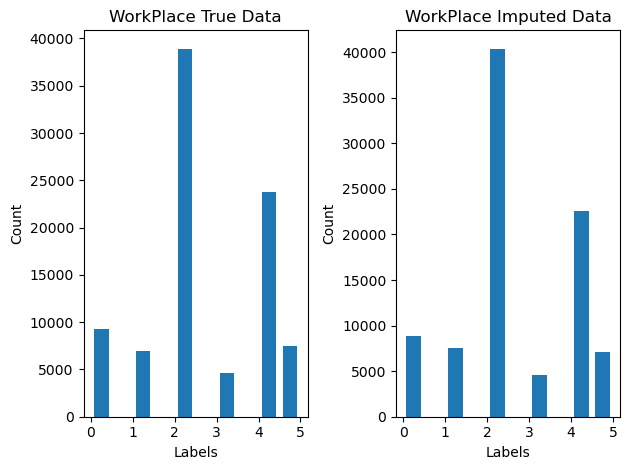

In [981]:
plt.subplot(1, 2, 1)
plt.hist(true_data['WorkPlace'],rwidth=0.7)
plt.title('WorkPlace True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.hist(imputed_df['WorkPlace'].astype(np.int64),rwidth=0.7)
plt.title('WorkPlace Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5])

plt.tight_layout()
plt.show()

In [982]:
print(true_data['WorkPlace'].value_counts().sort_index())

0     9300
1     6901
2    38911
3     4624
4    23806
5     7467
Name: WorkPlace, dtype: int64


In [983]:
print(imputed_df['WorkPlace'].value_counts().sort_index())

0     8855
1     7502
2    40389
3     4550
4    22607
5     7106
Name: WorkPlace, dtype: int64


In [984]:
print(true_data['WorkPlace'].value_counts().sort_index() - imputed_df['WorkPlace'].value_counts().sort_index())

0     445
1    -601
2   -1478
3      74
4    1199
5     361
Name: WorkPlace, dtype: int64


In [993]:
print(f' Accuracy for WorkPlace: {100 - ((601 + 1478) / (0.05 * len(true_data.index)) * 100)} %')
print(f' Percent misplaced labels: {(601 + 1478) / (0.05 * len(true_data.index)) * 100} %')

 Accuracy for WorkPlace: 54.31221088024261 %
 Percent misplaced labels: 45.68778911975739 %


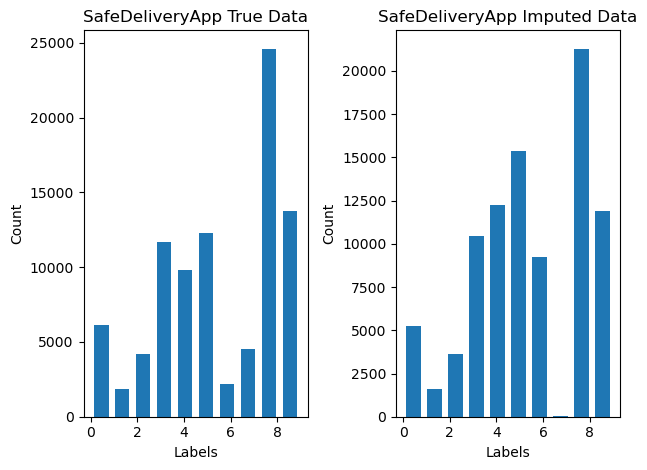

In [986]:
plt.subplot(1, 2, 1)
plt.hist(true_data['SafeDeliveryApp'],rwidth=0.7)
plt.title('SafeDeliveryApp True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.hist(imputed_df['SafeDeliveryApp'].astype(np.int64),rwidth=0.7)
plt.title('SafeDeliveryApp Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.tight_layout()
plt.show()

In [987]:
print(true_data['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index())

0     6099
1     1829
2     4192
3    11697
4     9813
5    12290
6     2201
7     4512
8    24599
9    13777
Name: SafeDeliveryApp, dtype: int64


In [988]:
print(imputed_df['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index())

0     5267
1     1598
2     3602
3    10482
4    12261
5    15351
6     9216
7       20
8    21288
9    11924
Name: SafeDeliveryApp, dtype: int64


In [989]:
print(true_data['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index() - imputed_df['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index())

0     832
1     231
2     590
3    1215
4   -2448
5   -3061
6   -7015
7    4492
8    3311
9    1853
Name: SafeDeliveryApp, dtype: int64


In [994]:
print(f' Accuracy for SafeDeliveryApp: {100 - ((2448+3061+7015) / (0.14 * len(true_data.index)) * 100)} %')
print(f' Percent misplaced labels: {((2448+3061+7015) / (0.14 * len(true_data.index))) * 100} %')

 Accuracy for SafeDeliveryApp: 1.7051688765475461 %
 Percent misplaced labels: 98.29483112345245 %


# Imputation directly by feature importance - SafeDeliveryApp

Let's try building data sets based on the direct feature importances for each feature, and then impute these systematically rather than collectively.
First we will do SafeDeliveryApp, as we can capture 68% of the feature importance, without the use of the other missing data dimensions.
Next we will do WorkPlace, as we will then hopefully be able to use SDA data for that imputation. With SDA we capture 70.5% of the feature importance.
Thirdly we will impute Profession, again using the previously imputed dimensions in order to reach 72% of the total explained feature importance.
Finally we will impute Experiance. This has proven to be the most difficult dimensions besides our previous attempts at location data imputation.

In [ ]:
data.columns

Index(['RN', 'UserinfoCountry', 'HealthcareWorker', 'Profession', 'Experiance',
       'WorkPlace', 'SafeDeliveryApp', 'UserinfoIsMyLearning',
       'UserinfoUserIsActive', 'KlpResultLevel', 'Module_Key', 'Time'],
      dtype='object')

In [910]:
data_SDA = data[['SafeDeliveryApp','Time','RN','KlpResultLevel','UserinfoCountry','UserinfoUserIsActive','HealthcareWorker','Module_Key']]
data_SDA_true = data[['SafeDeliveryApp','Time','RN','KlpResultLevel','UserinfoCountry','UserinfoUserIsActive','HealthcareWorker','Module_Key']]

In [272]:
data_SDA_true

,SafeDeliveryApp,Time,RN,KlpResultLevel,UserinfoCountry,UserinfoUserIsActive,HealthcareWorker,Module_Key
0,5,0.0,14.0,0.0,1,0.0,1,-1.0
1,3,0.0,10.0,0.0,1,0.0,1,-1.0
2,3,0.0,12.0,0.0,1,0.0,0,-1.0
3,5,0.0,15.0,0.0,1,0.0,1,-1.0
4,2,0.0,12.0,0.0,1,0.0,1,-1.0
...,...,...,...,...,...,...,...,...
91004,4,0.0,10.0,0.0,1,1.0,1,-1.0
91005,8,0.0,9.0,0.0,1,1.0,1,-1.0
91006,4,0.0,9.0,0.0,1,1.0,1,-1.0
91007,5,0.0,10.0,0.0,1,1.0,1,-1.0


In [277]:
#Percent missingness for SafeDeliveryApp : roughly 14 %

cols = ['SafeDeliveryApp']
for col in cols:
    data_SDA.loc[data_SDA.sample(frac=0.14, random_state = seed).index, col] = pd.np.nan

/tmp/ipykernel_54/2533812282.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_SDA.loc[data_SDA.sample(frac=0.14, random_state = seed).index, col] = pd.np.nan


In [278]:
data_SDA.isnull().sum()

SafeDeliveryApp         12741
Time                        0
RN                          0
KlpResultLevel              0
UserinfoCountry             0
UserinfoUserIsActive        0
HealthcareWorker            0
Module_Key                  0
dtype: int64

In [297]:
model_SDA = KNeighborsRegressor(n_neighbors=10,weights='distance',n_jobs=-1,)
imputer_SDA = IterativeImputer(sample_posterior=False, random_state=seed,estimator=model, max_iter=30,initial_strategy='constant')
scaler = MinMaxScaler(feature_range=(0, 1))
# Building the pipeline
pipeline_SDA = Pipeline(
    steps=[
    ('s', scaler), # First we scale the data
    ('i', imputer) # Then we fit the imputer and transform the NaN's
    ]
)

In [298]:
#Let's try to just fit_transform it
SDA_imputed = pipeline_SDA.fit_transform(data_SDA)

In [299]:
# A bit of tech wizardry to reverse our data back to a more recognizable format
SDA_imputed = scaler.inverse_transform(SDA_imputed)

In [300]:
# Let's get the names back to the imputed columns;
SDA_imputed = pd.DataFrame(SDA_imputed).astype(np.int64)
for i in list(range(0,6)):
    SDA_imputed.rename(columns={i:list(data_SDA_true.columns)[i]},inplace = True)

In [301]:
SDA_imputed.columns

Index([     'SafeDeliveryApp',                 'Time',                   'RN',
             'KlpResultLevel',      'UserinfoCountry', 'UserinfoUserIsActive',
                            6,                      7],
      dtype='object')

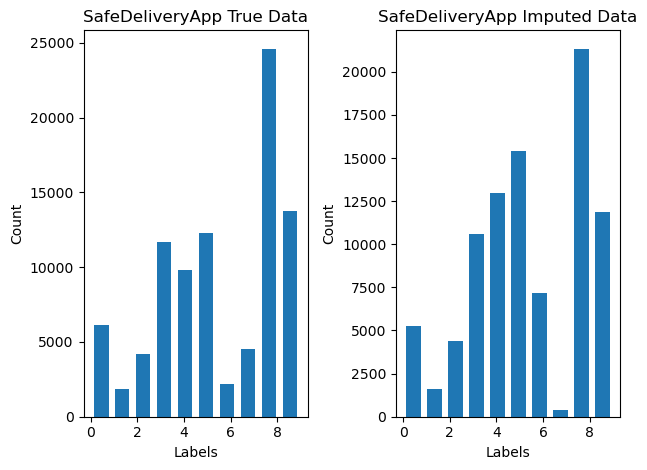

In [302]:
plt.subplot(1, 2, 1)
plt.hist(data_SDA_true['SafeDeliveryApp'],rwidth=0.7)
plt.title('SafeDeliveryApp True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.hist(SDA_imputed['SafeDeliveryApp'],rwidth=0.7)
plt.title('SafeDeliveryApp Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.tight_layout()
plt.show()

In [303]:
SDA_imputed['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index()

0     5264
1     1610
2     4376
3    10596
4    12965
5    15394
6     7167
7      417
8    21336
9    11884
Name: SafeDeliveryApp, dtype: int64

In [304]:
print(SDA_imputed['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index() - data_SDA_true['SafeDeliveryApp'].astype(np.int64).value_counts().sort_index())

0    -835
1    -219
2     184
3   -1101
4    3152
5    3104
6    4966
7   -4095
8   -3263
9   -1893
Name: SafeDeliveryApp, dtype: int64


In [307]:
((835 + 219 + 1101 + 4095 + 3263 + 1893) / (0.14 * 91004)) * 100 # Calculating percent of misplaced labels.

89.52510721663725

# Imputation directly by feature importance - WorkPlace

In [310]:
data_WorkPlace = data[['WorkPlace','Time','RN','KlpResultLevel','UserinfoCountry','UserinfoUserIsActive','HealthcareWorker']]
data_WorkPlace_true = data[['WorkPlace','Time','RN','KlpResultLevel','UserinfoCountry','UserinfoUserIsActive','HealthcareWorker']]

In [311]:
cols = ['WorkPlace'] # Roughly 5% data missing
for col in cols:
    data_WorkPlace.loc[data_WorkPlace.sample(frac=0.05, random_state = seed).index, col] = pd.np.nan

/tmp/ipykernel_54/1746946575.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_WorkPlace.loc[data_WorkPlace.sample(frac=0.05, random_state = seed).index, col] = pd.np.nan


In [312]:
modelWorkPlace = KNeighborsRegressor(n_neighbors=100,weights='distance',n_jobs=-1,)
imputerWorkPlace = IterativeImputer(sample_posterior=False, random_state=seed,estimator=model, max_iter=30,initial_strategy='most_frequent')
scaler = MinMaxScaler(feature_range=(0, 1))
# Building the pipeline
pipelineWorkPlace = Pipeline(
    steps=[
    ('s', scaler), # First we scale the data
    ('i', imputer) # Then we fit the imputer and transform the NaN's
    ]
)

In [313]:
imputed_Workplace = pipelineWorkPlace.fit_transform(data_WorkPlace)

In [314]:
imputed_Workplace = scaler.inverse_transform(imputed_Workplace)

Let's get the names back to the imputed columns;

In [315]:
imputed_Workplace = pd.DataFrame(imputed_Workplace).astype(np.int64)
for i in list(range(0,len(list(data_WorkPlace_true.columns)))):
    imputed_Workplace.rename(columns={i:list(data_WorkPlace_true.columns)[i]},inplace = True)

In [316]:
imputed_Workplace

,WorkPlace,Time,RN,KlpResultLevel,UserinfoCountry,UserinfoUserIsActive,HealthcareWorker
0,5,0,14,0,1,0,1
1,2,0,10,0,1,0,1
2,1,0,12,0,1,0,0
3,2,0,15,0,1,0,1
4,4,0,12,0,1,0,1
...,...,...,...,...,...,...,...
91004,4,0,10,0,1,1,1
91005,0,0,9,0,1,1,1
91006,0,0,9,0,1,1,1
91007,1,0,10,0,1,1,1


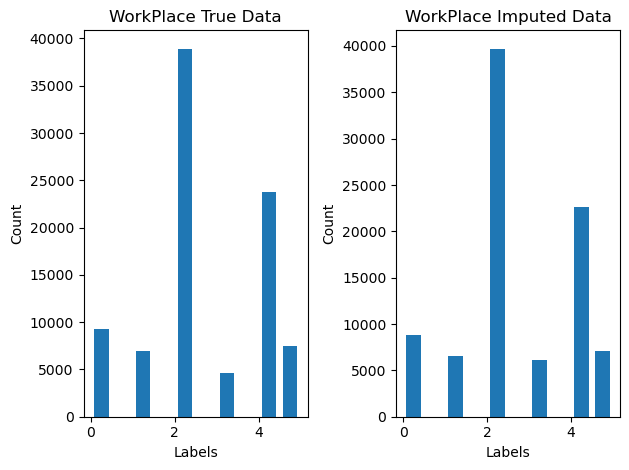

In [317]:
plt.subplot(1, 2, 1)
plt.hist(data_WorkPlace_true['WorkPlace'],rwidth=0.7)
plt.title('WorkPlace True Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.subplot(1, 2, 2)
plt.hist(imputed_Workplace['WorkPlace'],rwidth=0.7)
plt.title('WorkPlace Imputed Data')
plt.xlabel('Labels')
plt.ylabel('Count')
#plt.xticks([0,1,2,3,4,5])

plt.tight_layout()
plt.show()

In [319]:
print(imputed_Workplace['WorkPlace'].astype(np.int64).value_counts().sort_index() - data_WorkPlace_true['WorkPlace'].astype(np.int64).value_counts().sort_index())

0    -438
1    -303
2     794
3    1479
4   -1174
5    -358
Name: WorkPlace, dtype: int64


In [320]:
((438 + 303 + 1174 + 358) / (0.05 * 91004)) * 100 # Calculating percent of misplaced labels.

49.953848182497474

# Early conclusion on results

So this methodology seems to not improve our results in any way. The issue most likely lies with the dimensions we found to describe the imputed data.

When looking at our MSE versus variation comparison, the imputations seem to be solid estimates compared to the true mean value of the data.
However when predicting the labels, and comparing the redistribution, we see a much higher variety of precision.

According to our feature importance analysis, the Time dimension died matter a lot for each of the missing dimensions.
However, due to lack of variation amongst users in the Module_Key dimension, that seemed did not carry much importance for prediction.
More time spent on identifying relevant dimensions with higher variation among users, could most likely have improved some of the results.

Another thing that could be happening, is the dataframe index positions somehow being switched up some where in the process.
If this happened, the direct comparison using just the difference matrix could be flawed, however the value counts should still tell us the real story
of the true and wrong distributions.

Finally, our hyperparameter tuning of the estimator could be flawed as well, since we didn't succeed in finding a way to gridsearch for the optimal parameters.
Instead our testing/tuning was done in a more manual fashion for this project, although a method for more automated process most likely does exist.